# Ensemble Models

Leverage Sklearn to create:
- Decision Trees
- Ensemble models
    - Random Forests
    - AdaBoost
    - Gradient Boosting

## Initial setup 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read the dataset

In [3]:
data_file = "data/pima-indians-diabetes.csv"
diabetes_df = pd.read_csv(data_file)
diabetes_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


This file is missing column names, this dataset descrbes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes withtin five years.

The feature descriptions include: 
- preg = Number of times pregnant
- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- pres = Diastolic blood pressure (mm Hg)
- skin = Triceps skin fold thickness (mm)
- test = 2-Hour serum insulin (mu U/ml)
- mass = Body mass index (weight in kg/(height in m)^2)
- pedi = Diabetes pedigree function
- age = Age (years)
- label = Target variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [4]:
# add col names to df
column_names = ['preg','plas','pres','skin','test','mass','pedi','age','label']

diabetes_df = pd.read_csv(data_file, header=0, names=column_names)
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Data Exploration

In [5]:
# check the dataset size
print(f"Data shape = {diabetes_df.shape}")

Data shape = (767, 9)


In [6]:
# look at features stats
diabetes_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

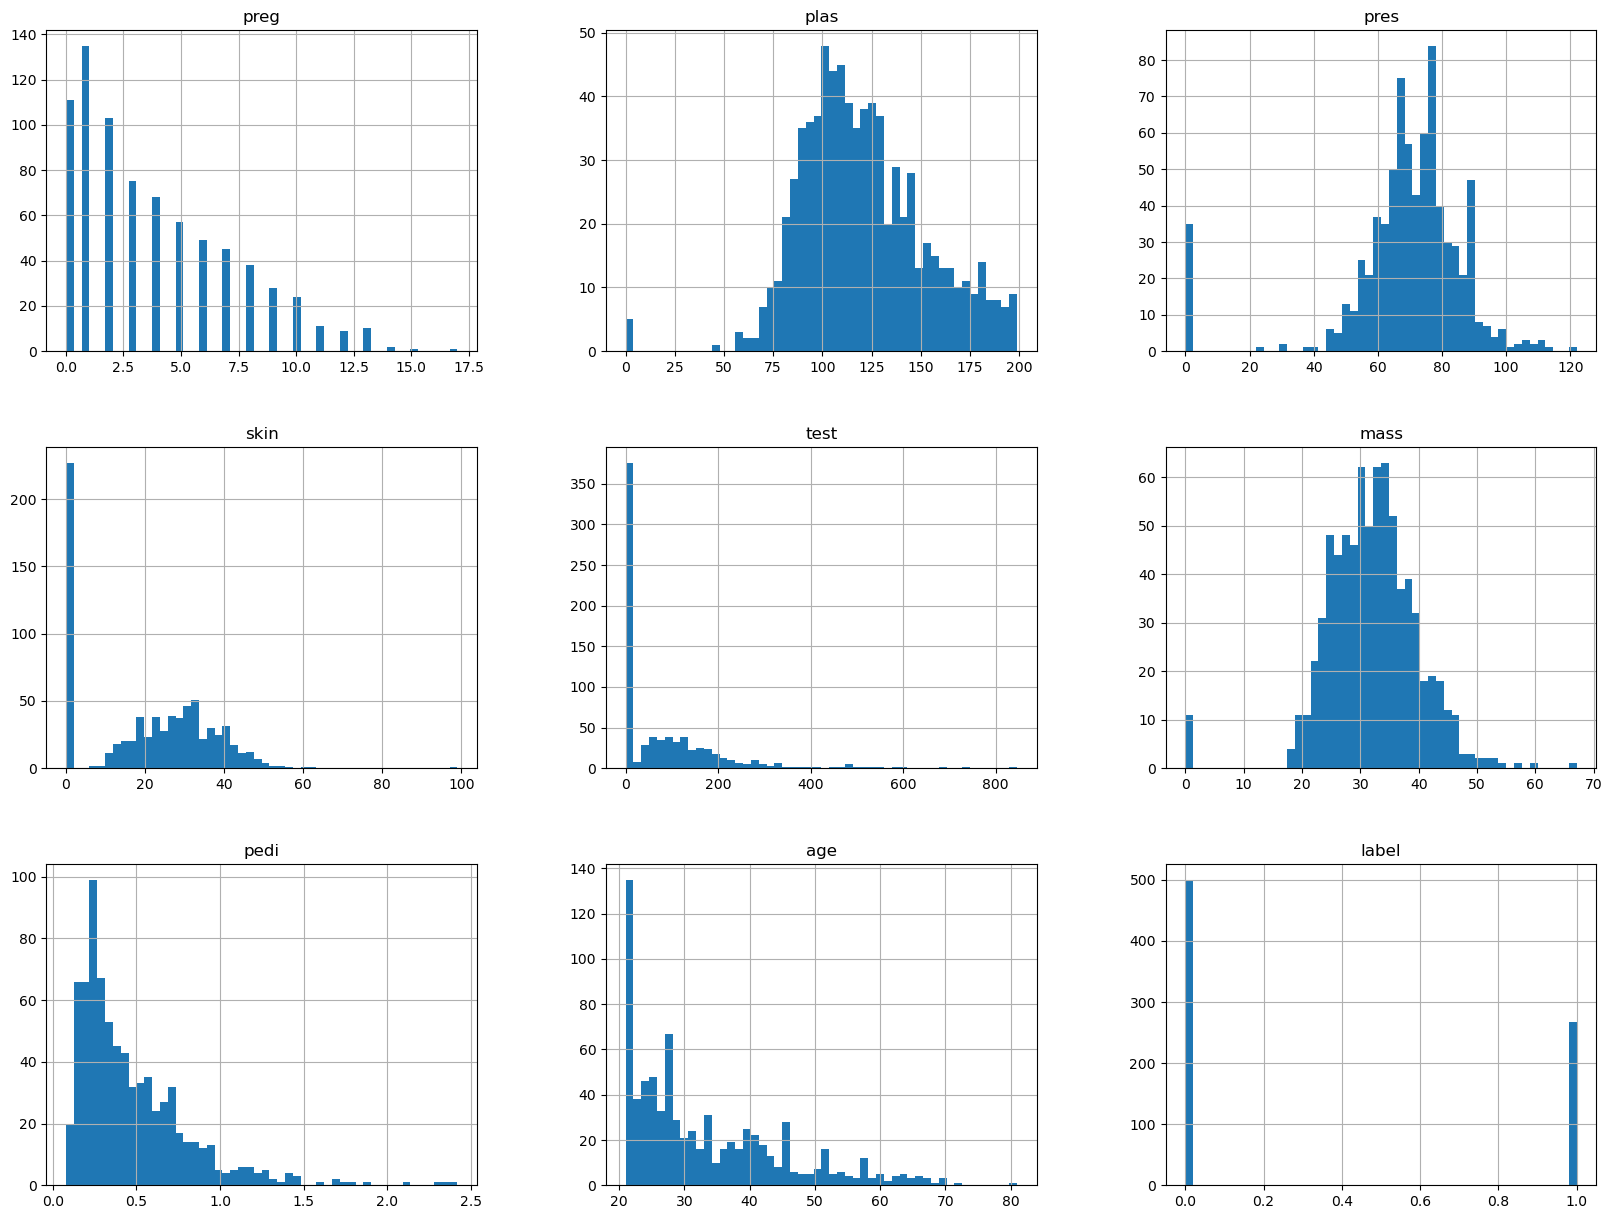

In [7]:
diabetes_df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='label', ylabel='count'>

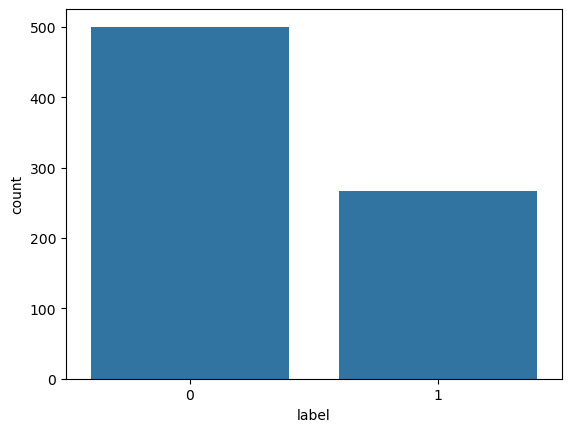

In [8]:
# visualze the label distribution
sns.countplot(x='label', data=diabetes_df)

There is considerable class imbalance leaning towards the neg class.

<Axes: >

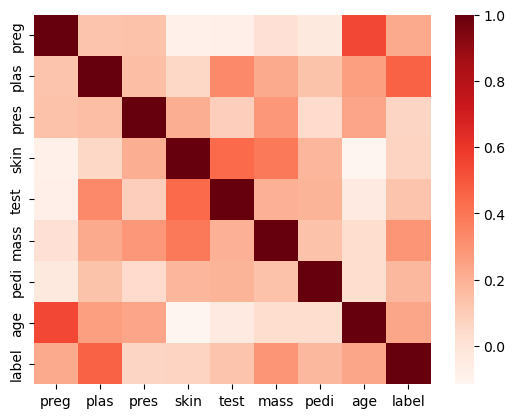

In [9]:
# look at feature correlations
sns.heatmap(diabetes_df.corr(), cmap="Reds")

## Data Splitting

Split the data before pre-processing to avoid data leakage.

In [10]:
# split usubg sckit learn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=12345)

# split the IDs and then get locations based on IDs
for train_index, test_index in split.split(diabetes_df, diabetes_df.label):
    strat_train_set = diabetes_df.loc[train_index]
    strat_test_set = diabetes_df.loc[test_index]

In [11]:
# check each set length
print(f'Train set shape = {strat_train_set.shape}')
print(f'Test set shape = {strat_test_set.shape}')

Train set shape = (690, 9)
Test set shape = (77, 9)


<Axes: xlabel='label', ylabel='count'>

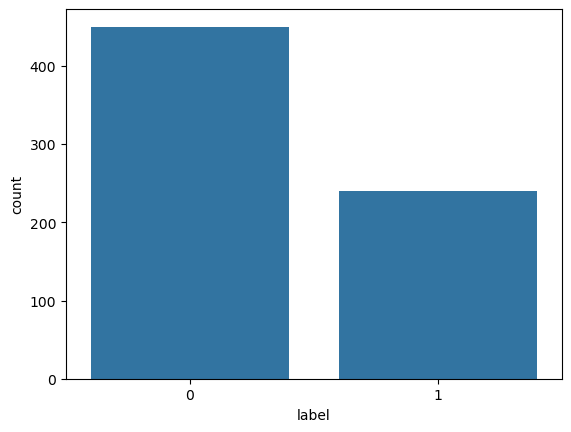

In [12]:
# visualize the label distributions
sns.countplot(x='label', data = strat_train_set)

<Axes: xlabel='label', ylabel='count'>

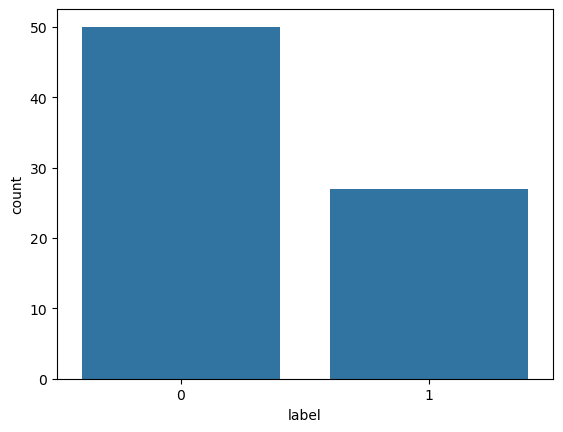

In [13]:
sns.countplot(x='label', data = strat_test_set)

In [14]:
# seprate the features from the labels
X_train = strat_train_set.drop('label', axis=1)
y_train = strat_train_set['label']

X_test = strat_test_set.drop('label', axis=1)
y_test = strat_test_set['label']

In [15]:
X_train.shape

(690, 8)

## Data Pre-processing

The dataset contains numerical features exclusively. For decision trees, scaling pre-processing is not required as they use thresholds in the feature space.

### Missing values

In [16]:
# check for missing values
diabetes_df[diabetes_df.isnull().any(axis=1)]

,preg,plas,pres,skin,test,mass,pedi,age,label


## Empirical Decision Tree

In [17]:
class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1] 

In [18]:
type(X_train)

pandas.core.frame.DataFrame

Compare the histrograms for each features and try to see if there are suitable thresholds.

<Axes: ylabel='Frequency'>

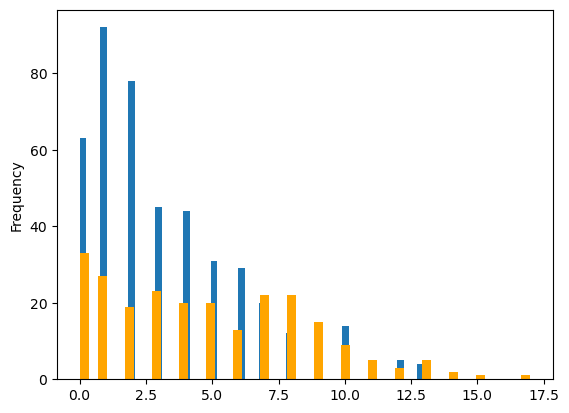

In [19]:
# num pregnancies
class0['preg'].plot.hist(bins=50)
class1['preg'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

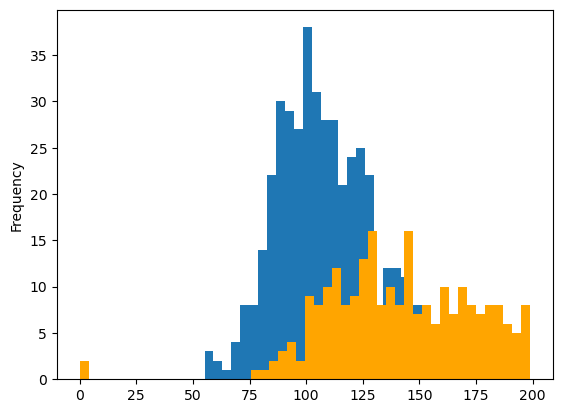

In [20]:
# plasma glucose concentration
class0['plas'].plot.hist(bins=50)
class1['plas'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

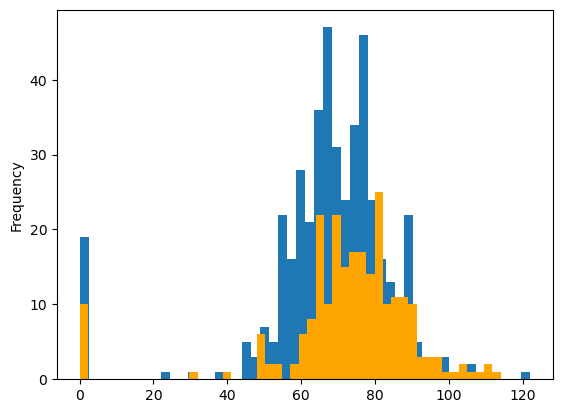

In [21]:
# diastolic blood  pressure
class0['pres'].plot.hist(bins=50)
class1['pres'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

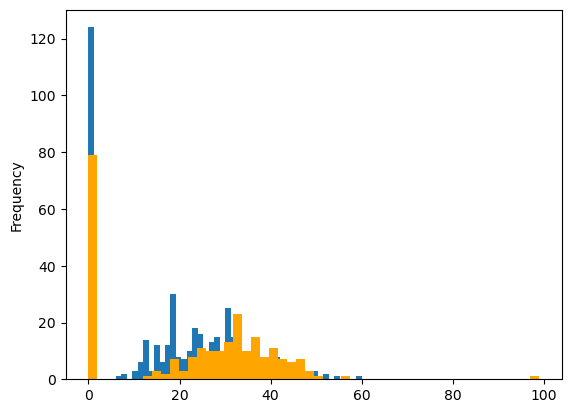

In [22]:
# skin fold thickness
class0['skin'].plot.hist(bins=50)
class1['skin'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

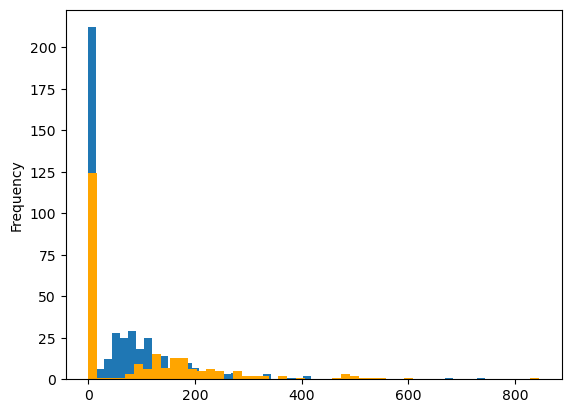

In [23]:
# 2-hr serum insulin
class0['test'].plot.hist(bins=50)
class1['test'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

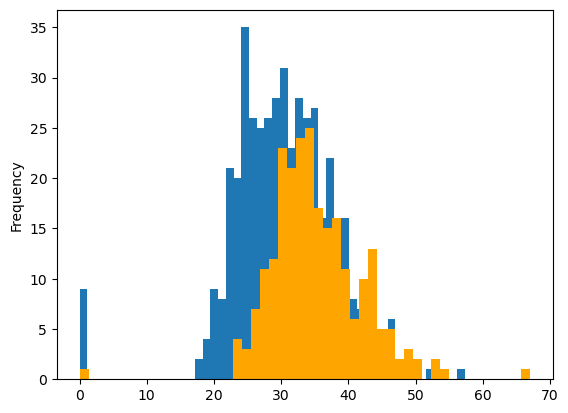

In [24]:
# body mass index
class0['mass'].plot.hist(bins=50)
class1['mass'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

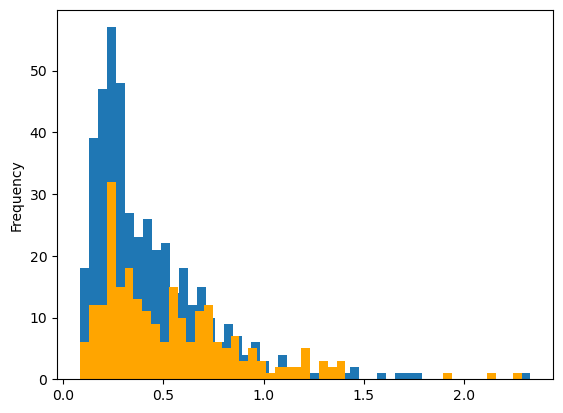

In [25]:
# diabetes pedigree
class0['pedi'].plot.hist(bins=50)
class1['pedi'].plot.hist(bins=50, color='orange')

<Axes: ylabel='Frequency'>

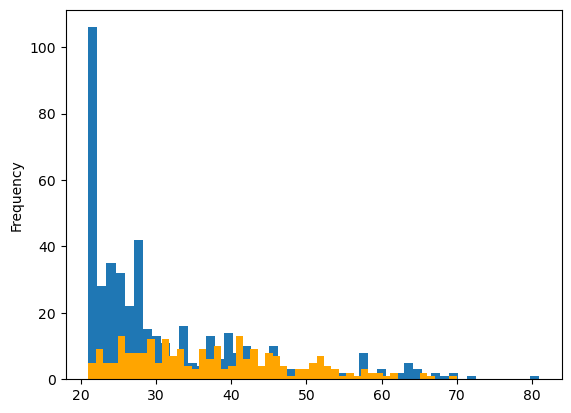

In [26]:
# age 
class0['age'].plot.hist(bins=50)
class1['age'].plot.hist(bins=50, color='orange')

In [27]:
def simpleDT(feat_thres_dict, test_data):
    # create an array to store the predictions
    predictions = np.zeros(len(test_data))
    
    # loop through the rest of the test data DF
    for idx in range(len(test_data)):
        
        sample = test_data.iloc[idx]
        
        # check first feature/threshold
        if sample[feat_thres_dict[1]['feat']] > feat_thres_dict[1]['thres']:
                  
            # check second feature/threshold
            if sample[feat_thres_dict[2]['feat']] > feat_thres_dict[2]['thres']:
                  
                # check third feature/threshold
                if sample[feat_thres_dict[3]['feat']] > feat_thres_dict[3]['thres']:
                     predictions[idx] = 1
                  
    return predictions            

In [28]:
# replace the 'feat' and 'thres' strings with actual feature names and threshold values
d = { 1: { 'feat': 'age', 'thres': 29}, 
      2: { 'feat': 'plas', 'thres': 125},
      3: { 'feat': 'mass', 'thres': 35}}

# obtain the predictions
y_pred = simpleDT(d, X_test)

In [29]:
# evaluate the performance of the decision tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81        50
           1       0.83      0.19      0.30        27

    accuracy                           0.70        77
   macro avg       0.76      0.58      0.56        77
weighted avg       0.74      0.70      0.63        77



## 'Random' Forest

Create a random forest from these empirical trees.

In [30]:
# individual trees

d1 = {1: { 'feat': 'age', 'thres': 29}, 
      2: { 'feat': 'plas', 'thres': 125},
      3: { 'feat': 'mass', 'thres': 35}}

y_pred1 = simpleDT(d1, X_test)
report = classification_report(y_test, y_pred1, output_dict=True)
print(f"First tree positive-class F1-score:{round(report['1']['f1-score'], 4)}")

d2 = {1: { 'feat': 'test', 'thres': 180},
      2: { 'feat': 'mass', 'thres': 30}, 
      3: { 'feat': 'skin', 'thres': 25}}

y_pred2 = simpleDT(d2, X_test)
report = classification_report(y_test, y_pred2, output_dict=True)

print(f"Second tree positive-class F1-score:{round(report['1']['f1-score'], 4)}")
      
d3 = {1: { 'feat': 'pres', 'thres': 75}, 
      2: { 'feat': 'age', 'thres': 25},
      3: { 'feat': 'preg', 'thres': 3}}

y_pred3 = simpleDT(d3, X_test)
report = classification_report(y_test, y_pred3, output_dict = True)
print(f"Third tree positive-class F1-score:{round(report['1']['f1-score'], 4)}")

First tree positive-class F1-score:0.303
Second tree positive-class F1-score:0.2286
Third tree positive-class F1-score:0.3243


In [31]:
forest_votes = y_pred1 + y_pred2 + y_pred3
forest_votes

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 2., 0.])

In [32]:
forest_preds = np.where(forest_votes >= 2, 1., 0.)
forest_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [33]:
report = classification_report(y_test, forest_preds)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.98      0.79        50
           1       0.67      0.07      0.13        27

    accuracy                           0.66        77
   macro avg       0.66      0.53      0.46        77
weighted avg       0.66      0.66      0.56        77



## Decision Trees

Create a decsion tree using Sklearn's DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [35]:
# instantiate the model
dt = DecisionTreeClassifier(random_state=12345)

# fit to the data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

In [36]:
# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# show the evalutation results for the pos class
print(report['1'])

{'precision': 0.625, 'recall': 0.5555555555555556, 'f1-score': 0.5882352941176471, 'support': 27.0}


[Text(0.5199205914567361, 0.96875, 'x[1] <= 143.5\ngini = 0.454\nsamples = 690\nvalue = [450, 240]'),
 Text(0.22439759036144577, 0.90625, 'x[5] <= 26.95\ngini = 0.362\nsamples = 531\nvalue = [405, 126]'),
 Text(0.05257393209200438, 0.84375, 'x[1] <= 124.5\ngini = 0.056\nsamples = 140\nvalue = [136, 4]'),
 Text(0.017524644030668127, 0.78125, 'x[5] <= 26.45\ngini = 0.017\nsamples = 116\nvalue = [115, 1]'),
 Text(0.008762322015334063, 0.71875, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(0.02628696604600219, 0.71875, 'x[3] <= 21.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.017524644030668127, 0.65625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03504928806133625, 0.65625, 'x[3] <= 26.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02628696604600219, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04381161007667032, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08762322015334063, 0.78125, 'x[4] <= 30.0\ngini = 0.219\nsamples = 2

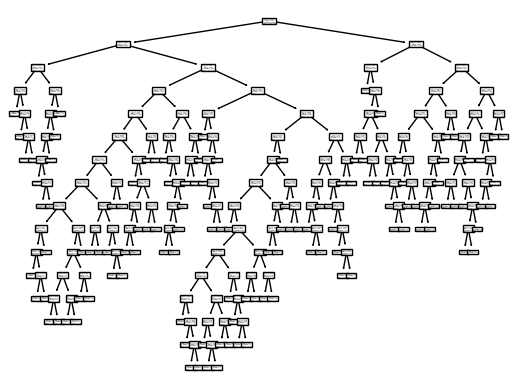

In [37]:
#  visualize the DT
plot_tree(dt)

Test different depth values [1, 3, 5] to see how the performance on the test data varies.

{'precision': 0.6875, 'recall': 0.4074074074074074, 'f1-score': 0.5116279069767441, 'support': 27.0}


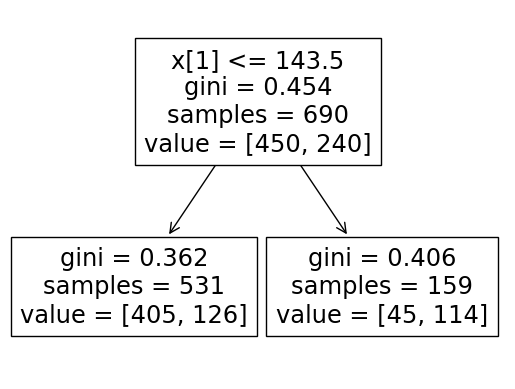

In [38]:
# depth = 1
# instantiate the model
dt = DecisionTreeClassifier(random_state=12345, max_depth=1)

# fit to the data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# visualize the DT
plot_tree(dt)

# show the evaluation results for the positive class
print(report['1'])

{'precision': 0.6875, 'recall': 0.4074074074074074, 'f1-score': 0.5116279069767441, 'support': 27.0}


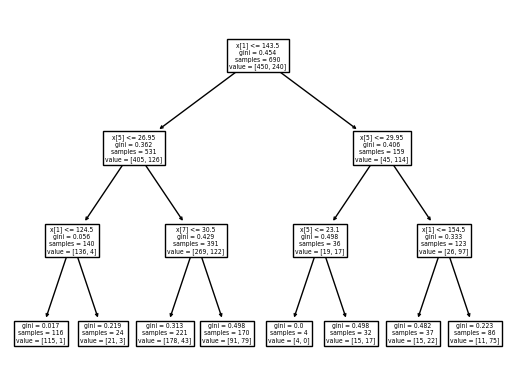

In [39]:
# depth = 3
# instantiate the model
dt = DecisionTreeClassifier(random_state=12345, max_depth=3)

# fit to the data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# visualize the DT
plot_tree(dt)

# show the evaluation results for the positive class
print(report['1'])

{'precision': 0.7894736842105263, 'recall': 0.5555555555555556, 'f1-score': 0.6521739130434783, 'support': 27.0}


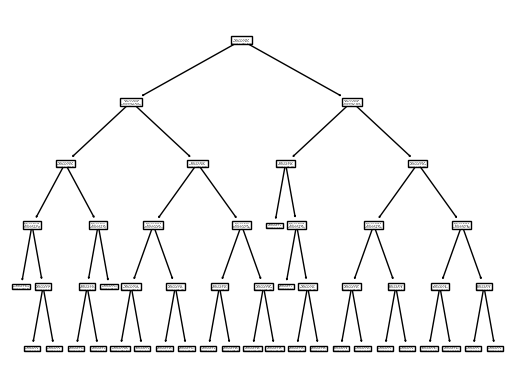

In [40]:
# depth = 5
# instantiate the model
dt = DecisionTreeClassifier(random_state=12345, max_depth=5)

# fit to the data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# visualize the DT
plot_tree(dt)

# show the evaluation results for the positive class
print(report['1'])

Other relevant model parameters to consider are:
* min_samples_split - the minimum number of samples required to split an internal node
* min_samples_leaf - the minimum number of samples to be at a leaf node
* max_features - the number of features to consider when looking for the best split
* criterion - the function to measure the quality of the split ['gini', 'entropy', 'log-loss']

## Random Forest

Use Sklearn's RandomForestClassifier to create a RF.

In [41]:
# import 
from sklearn.ensemble import RandomForestClassifier

In [42]:
# object instantiation
rf = RandomForestClassifier(random_state=12345, bootstrap=True, max_depth=5, n_estimators=100)

- random_state: set a seed for all processes that involve randomness
- boostrap: whether to use a subset of samples to build each tree, if false, entire dataset is used
- n_estimators: the number of trees in the forest

In [43]:
# fit
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=12345)

In [44]:
# predict on the test data
y_pred = rf.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# shwo the evaluation results for the pos class
print(report['1'])

{'precision': 0.8, 'recall': 0.5925925925925926, 'f1-score': 0.6808510638297872, 'support': 27.0}


- oob_score: whether to use out-of-bag sample to estimate generalization score (bootstrap = True)
- max_samples: the number of samples to train each base estimator (bootstrap = True)
- other parameters shared with DT:
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_features, etc.

## Hyper-parameter Tuning

A *greedy* strategy would be to optimize each parameter one at a time, greedy algorithms tend to get stuck in local optimal points.

A *brute force*, i.e., try every possible combination is extremely time-consuming and requires significant organization skills.

Sklearn provides the GridSearchCV class to do it:

In [45]:
# imports
from sklearn.model_selection import GridSearchCV

The parameters and their values must be provided in a dictionary where the key-value pairs are as follows:
- 'parameter_name': iterable object of values

In [50]:
parameters = {'max_depth': [1, 3, 5, 7],
             'n_estimators': [10, 30, 50, 100],
             'criterion': ['gini', 'entropy']}

Using this dictionary, Gridsearch will try 32 different combinations.

In [51]:
# the GridSearch constructor takes an estimator to be used and the parameter dict
gds = GridSearchCV(RandomForestClassifier(bootstrap=True), parameters)

In [52]:
# fitting (might take a while..)
gds.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [10, 30, 50, 100]})

In [53]:
results_df = pd.DataFrame(gds.cv_results_)

In [54]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007577,0.000853,0.001389,0.000234,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.652174,0.681159,0.695652,0.739130,0.717391,0.697101,0.029842,25
1,0.018371,0.000774,0.002168,0.000674,gini,1,30,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.710145,0.652174,0.644928,0.688406,0.688406,0.676812,0.024509,30
2,0.029898,0.000512,0.002348,0.000064,gini,1,50,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.681159,0.666667,0.673913,0.673913,0.688406,0.676812,0.007390,30
3,0.073836,0.006158,0.004599,0.001534,gini,1,100,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.724638,0.695652,0.652174,0.666667,0.695652,0.686957,0.025269,27
4,0.009256,0.001091,0.001558,0.000224,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.739130,0.702899,0.753623,0.804348,0.724638,0.744928,0.034112,23


What was the best parameter combination?

In [55]:
print(f"The best performing parameters were: {gds.best_params_}")
print(f"With a mean validation score of: {gds.best_score_}")

The best performing parameters were: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
With a mean validation score of: 0.7840579710144928


See how the best performing model does on the test data.

In [56]:
# obtain the best performing model
best_rf = gds.best_estimator_

In [57]:
# predicting on the test data
y_pred = best_rf.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# show the evaluation results for the pos class
print(report['1'])

{'precision': 0.7894736842105263, 'recall': 0.5555555555555556, 'f1-score': 0.6521739130434783, 'support': 27.0}


## Boosting 

Create boosting ensemble methods with Sklearn

#### AdaBoost

In [58]:
# import 
from sklearn.ensemble import AdaBoostClassifier

In [59]:
# instantiate the model
abc = AdaBoostClassifier(n_estimators=100, random_state=12345)

In [60]:
# fit
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=12345)

In [61]:
# predict on the test data
y_pred = abc.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# show the evaluation results for the pos class
print(report['1'])

{'precision': 0.7619047619047619, 'recall': 0.5925925925925926, 'f1-score': 0.6666666666666666, 'support': 27.0}


#### Gradient Boosting

In [62]:
# import 
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
# set the learning rate and max depth to 1 to use the same settings as previously with AdaBoost
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, random_state=12345)

In [64]:
# fit
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=12345)

In [66]:
# predict on the test data
y_pred = gbc.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# showing the evaluation results for the positive class
print(report['1'])

{'precision': 0.8333333333333334, 'recall': 0.5555555555555556, 'f1-score': 0.6666666666666667, 'support': 27.0}


Use Grid Seach to tune the learning_rate, max_depth, and n_estimators of a a GradientBoostingClassifier model.

In [67]:
parameters = {'max_depth': [1, 3, 5 , 7],
             'n_estimators': [10, 30, 50, 100],
             'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

In [68]:
gds = GridSearchCV(GradientBoostingClassifier(), parameters)

In [69]:
gds.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [10, 30, 50, 100]})

In [70]:
print(f"The best performing parameters were: {gds.best_params_}")
print(f"With a mean validation score of: {gds.best_score_}")

The best performing parameters were: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
With a mean validation score of: 0.7666666666666667


In [71]:
# obtain the best performing model
best_rf = gds.best_estimator_

In [72]:
# predict on the test data
y_pred = best_rf.predict(X_test)

# evaluation
report = classification_report(y_test, y_pred, output_dict=True)

# show the evaluation results for the pos class
print(report['1'])

{'precision': 0.75, 'recall': 0.5555555555555556, 'f1-score': 0.6382978723404256, 'support': 27.0}
